In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/obesity_gini_country_age_group_check_20150511.csv")

In [4]:
df$age_cat = factor(df$age_cat, levels = c('All', 'Age [10, 20)', 'Age [20, 30)', 
                                           'Age [30, 40)', 'Age [40, 50)', 'Age [50, 100)'))

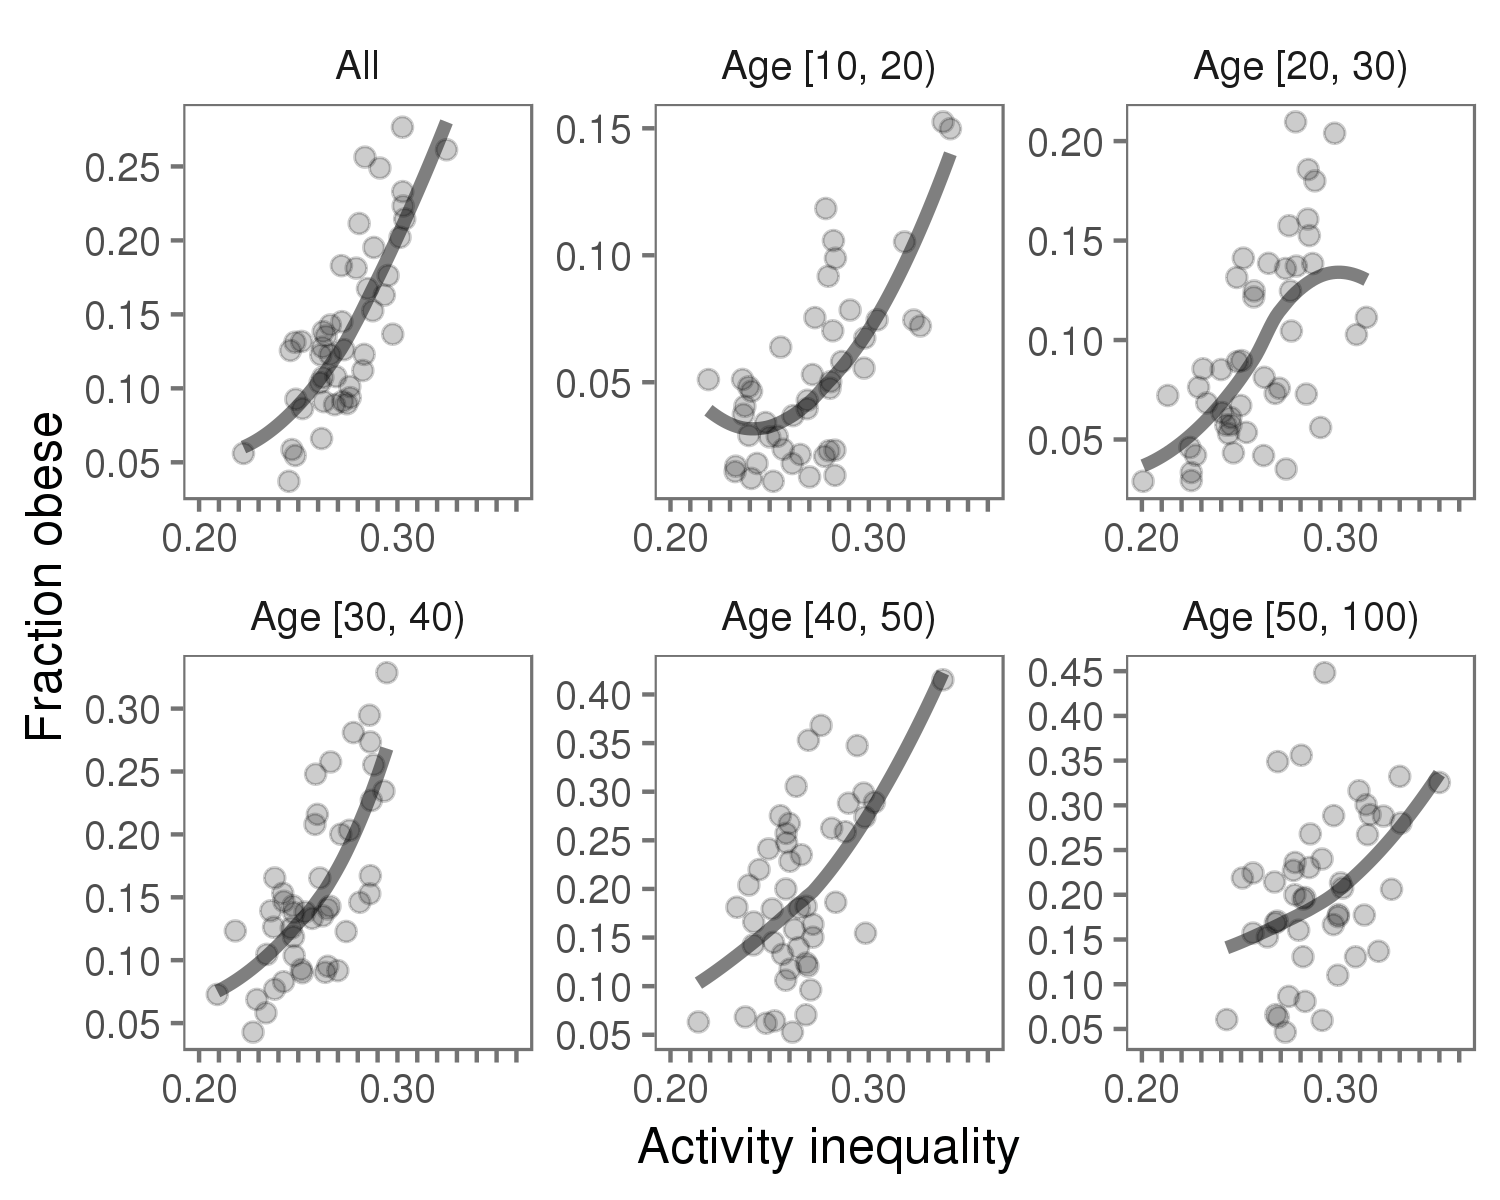

In [5]:
p <- ggplot(df, aes(steps_gini, obesity_mean, label=country))
p <- p + geom_smooth(method="loess",span=1.1,  se = F, size=1.5, alpha=1.0, color="gray50", method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=2.0) 
p <- p + facet_wrap(~ age_cat, scales="free")

p <- p + xlab("Activity inequality") + ylab("Fraction obese")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set2")

# xticks
ticks = seq(.20,.36,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 10)] = sprintf("%.2f", ticks[seq(1, length(labels), 10)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.20, .36))
# yticks
ticks = seq(.00,.50,by=0.05) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 1)] = sprintf("%.2f", ticks[seq(1, length(labels), 1)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)#, limits=c(.0, .50))
p

ggsave(filename="../output/edfig3c.pdf", plot=p, width=4, height=3)